---
# Task #7: MNIST Handwritten Digit Classification

### _Author : SANDHYA S_
### _Date: 12 August '21_
### _Problem Statement:_
_**Develop a Neural Network that can read handwritting with the MNIST Handwritten digit dataset using Tensorflow and CNN.**_

---

## _Importing Libraries_

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageOps  

## _Loading and Preparing Training & Testing Data_

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Structure of each set in Train & Test data
print(f'train_images: {train_images.shape}\ttest_images: {test_images.shape}\
      \ntrain_labels: {train_labels.shape}\t\ttest_labels: {test_labels.shape}')

train_images: (60000, 28, 28)	test_images: (10000, 28, 28)      
train_labels: (60000,)		test_labels: (10000,)


In [4]:
# Unique labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## _Data Pre-processing_

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

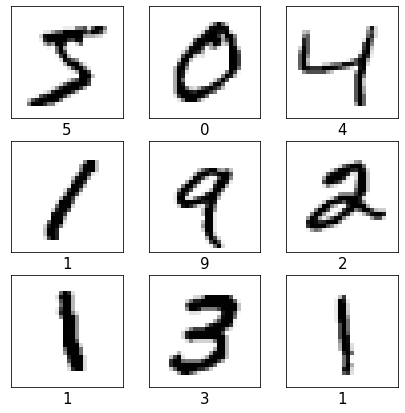

In [6]:
# Displaying first 9 images
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i], fontsize=15)
plt.show()

## _Building Model & Hyperparameter tuning_

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                             restore_best_weights=True, verbose=1)

history = model.fit(train_images, train_labels, batch_size=32, callbacks=[callbacks], 
                    validation_data=(test_images, test_labels), epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2600 - accuracy: 0.9263 - val_loss: 0.1325 - val_accuracy: 0.9605
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1108 - accuracy: 0.9665 - val_loss: 0.0935 - val_accuracy: 0.9706
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9768 - val_loss: 0.0887 - val_accuracy: 0.9721
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0784 - val_accuracy: 0.9758
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0830 - val_accuracy: 0.9748
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0775 - val_accuracy: 0.9778
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0751 - val_accuracy:

## _Evaluating the Model_

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)
print('Test Loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9801
Test accuracy 0.9800999760627747
Test Loss 0.07227463275194168


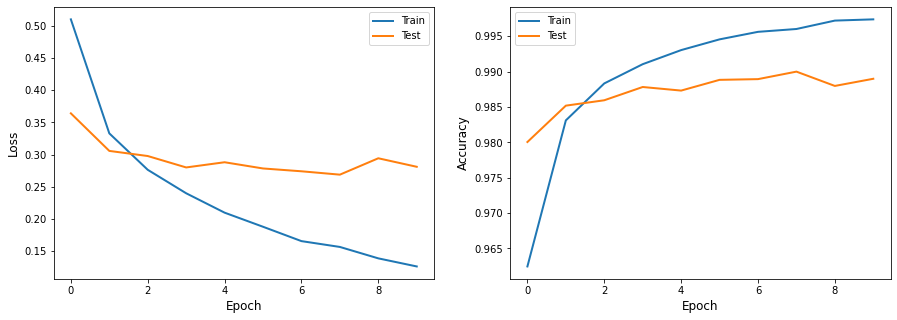

In [10]:
plt.figure(figsize=(15, 5))

# Plotting Loss function
plt.subplot(1, 2, 1)
plt.plot(np.sqrt(history.history['loss']), linewidth=2, label='Train')
plt.plot(np.sqrt(history.history['val_loss']), linewidth=2, label='Test')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.sqrt(history.history['accuracy']), linewidth=2, label='Train')
plt.plot(np.sqrt(history.history['val_accuracy']), linewidth=2, label='Test')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.show()

## _Predicting for Testing Dataset_

In [11]:
predictions = model.predict(test_images)

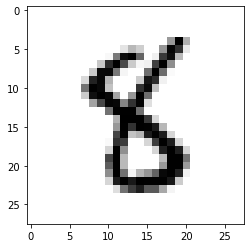

Test Label: 8
Predicted digit: 8


In [12]:
# Plotting 345th image
plt.figure()
plt.imshow(test_images[344], cmap=plt.cm.binary)
plt.show()
print('Test Label:', test_labels[344])
print('Predicted digit:', np.argmax(predictions[344]))

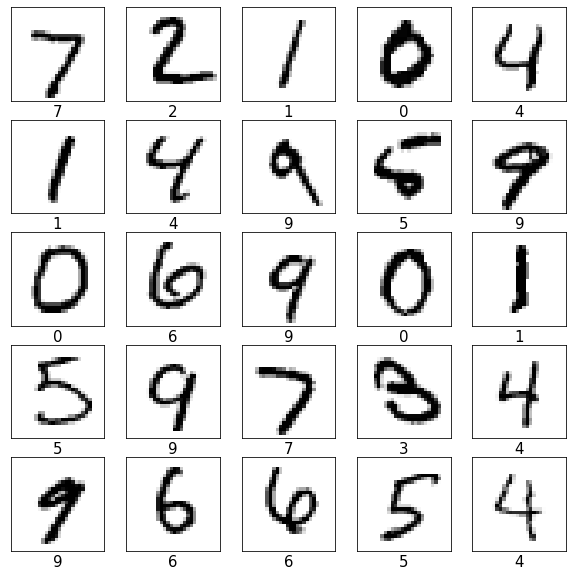

In [13]:
# Plotting First 25 images with prediction
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]), fontsize=15)
plt.show()

## _Predicting own data_

Size of Image: (200, 200)


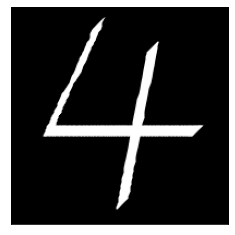

In [14]:
digit = Image.open('digit.png')
print('Size of Image:', digit.size)
plt.imshow(digit, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

### * _Preprocessing_

Size of Image: (200, 200)


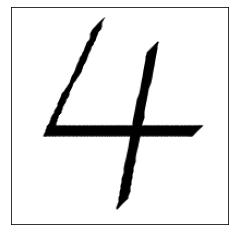

In [15]:
# Converting image to grayscale
image = ImageOps.grayscale(digit)  
print('Size of Image:', image.size)
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

Size of Image: (28, 28)


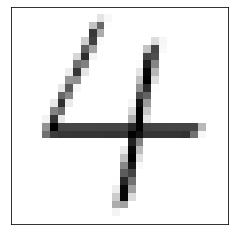

In [16]:
# Resizing image to (28, 28)
image = image.resize((28, 28))
print('Size of Image:', image.size)
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

### * _Making prediction_

In [17]:
pred = model.predict((np.array(image)/255.0).reshape(1, 28, 28, 1))
print('The digit predicted is', pred.argmax())

The digit predicted is 4


---
## _Thank You!_